<a href="https://colab.research.google.com/github/AbdullahHafiz30/Tuwaiq_Academy_T5_Week6/blob/main/Practice%20Exercise/OCR_Practice_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Practice Exercise

In this exercise, you will work on Optical Character Recognition (OCR) using the Keras OCR library.
Your task is to detect and recognize text from images. This notebook will guide you through the process of setting up the environment, loading and preprocessing images, applying the OCR model, and displaying the results.

## Objectives
- Set up the environment and install necessary libraries.
- Load and preprocess images for OCR.
- Apply the Keras OCR model to detect and recognize text.
- Display and analyze the OCR results.

This exercise is designed to help you understand the OCR pipeline, from image preprocessing to text recognition, and prepare you for the practical exam.
The example image can be found under `Datasets/OCR_Example`.

## Install Libraries

In [36]:
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy Release
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 1s (178 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to pro

In [37]:
!pip install pytesseract
!pip install easyocr
!pip install keras-ocr
!pip install keras==2.9.0 tensorflow==2.9.1

## Import necessary libraries
In this step, you can import these libraries to help you:
- `keras_ocr`
- `matplotlib.pyplot`
- `keras_ocr.pipeline.Pipeline`
- `opencv`
- `numpy`

You can use any other libraries

In [38]:
import keras_ocr
import matplotlib.pyplot as plt
import keras_ocr.pipeline
import numpy as np
import cv2
import pytesseract
import easyocr
import keras_ocr
from PIL import Image

## Download and visualize sample image
Here we will be downloading the image for OCR.

In [53]:
!unzip /tmp/Datasets.zip
y
[n]

Archive:  /tmp/Datasets.zip
replace Datasets/Example.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

NameError: name 'y' is not defined

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
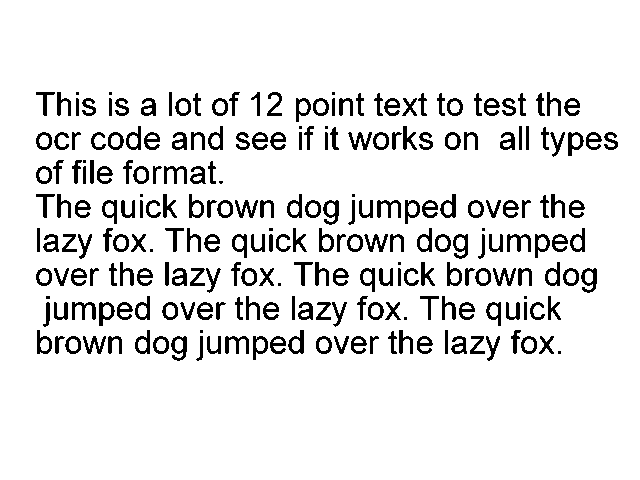

In [87]:
im_path = "/content/Datasets/OCR_example.png"
image = cv2.imread(im_path)
image

## Preprocess the image
This step involves converting the images into a format suitable for OCR, using OpenCV and standard preprocessing techniques such as resizing and color conversion.

### Convert to grayscale

In [88]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Remove noise

In [89]:
blur = cv2.medianBlur(gray, 5)

### Sharpen the image

In [90]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [91]:
sharp = cv2.filter2D(blur, -1, kernel )

### Binarize the image

In [92]:
bina = cv2.threshold(sharp, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

## Display preprocessed images
Display the preprocessed images .

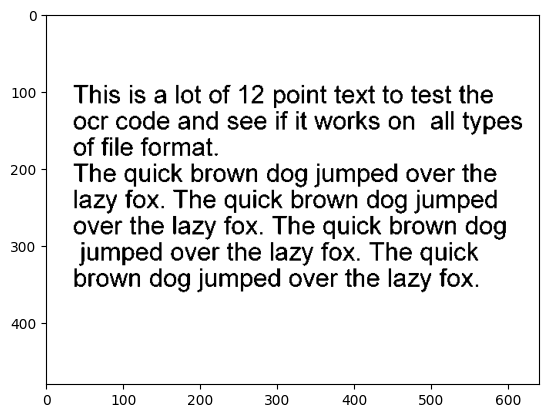

In [93]:
plt.imshow(image)

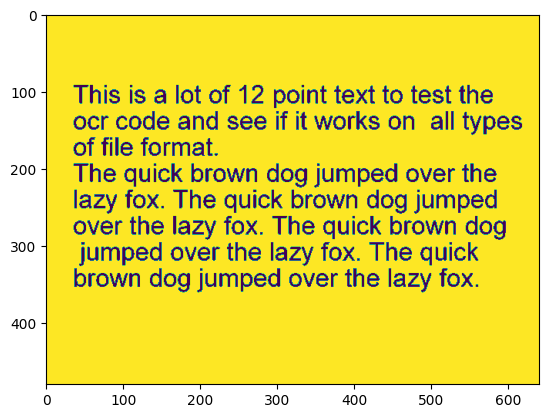

In [94]:
plt.imshow(gray)

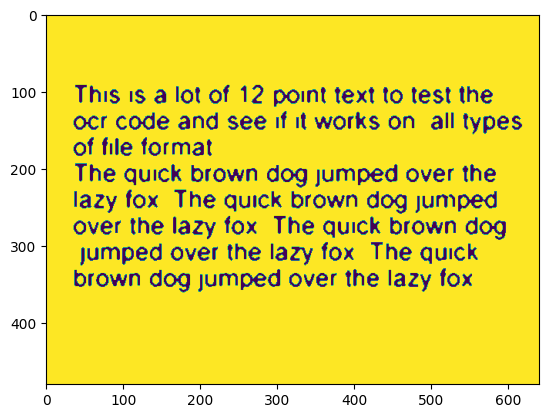

In [95]:
plt.imshow(blur)

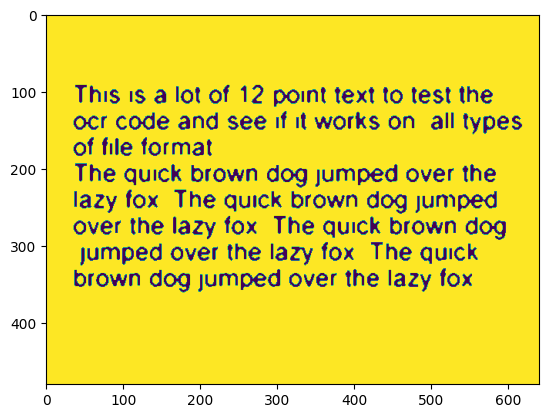

In [96]:
plt.imshow(sharp)

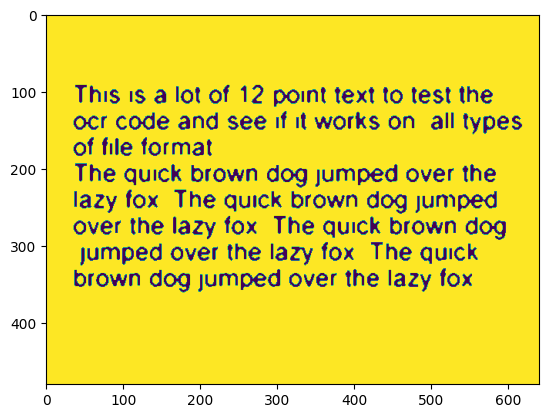

In [97]:
plt.imshow(bina)

## Get the OCR model using keras_ocr
Create a keras_ocr pipeline, to handle text detection and recognition using pre-trained model.

In [98]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## Perform OCR on the image
Runs the OCR pipeline on the preprocessed image and extracts text.

In [99]:
bina.shape

(480, 640)

In [103]:
image = cv2.cvtColor(bina, cv2.COLOR_GRAY2RGB)
image.shape

(480, 640, 3)

In [104]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(480, 640, 3)

In [105]:
image = [image]

In [106]:
prediction_groups = pipeline.recognize(image)

2/2 [==============================] - 18s 8s/step


## Display the OCR predictions
The predictions made by the keras_ocr pipeline are stored in a variable. You should inspect the recognized text and do the following:
* You should print the detected texts in the image.
* You can also use `keras_ocr.tools.drawAnnotations()` to visualize the extracted text.

In [108]:
for predictions in prediction_groups:
  for prediction in predictions:
    print(prediction[0])

12
this
of
the
lot
point
text
to
test
a
is
code
and
if
warks
it
all
types
ccr
see
on
of
file
format
thne
dog
jumped
thne
quick
brown
over
the
fax
quick
brown
dog
jumped
lazy
thne
the
fox
quick
dog
lazy
brown
over
the
the
fox
quick
jumped
lazy
over
jumped
thne
fax
brown
dog
lazy
over


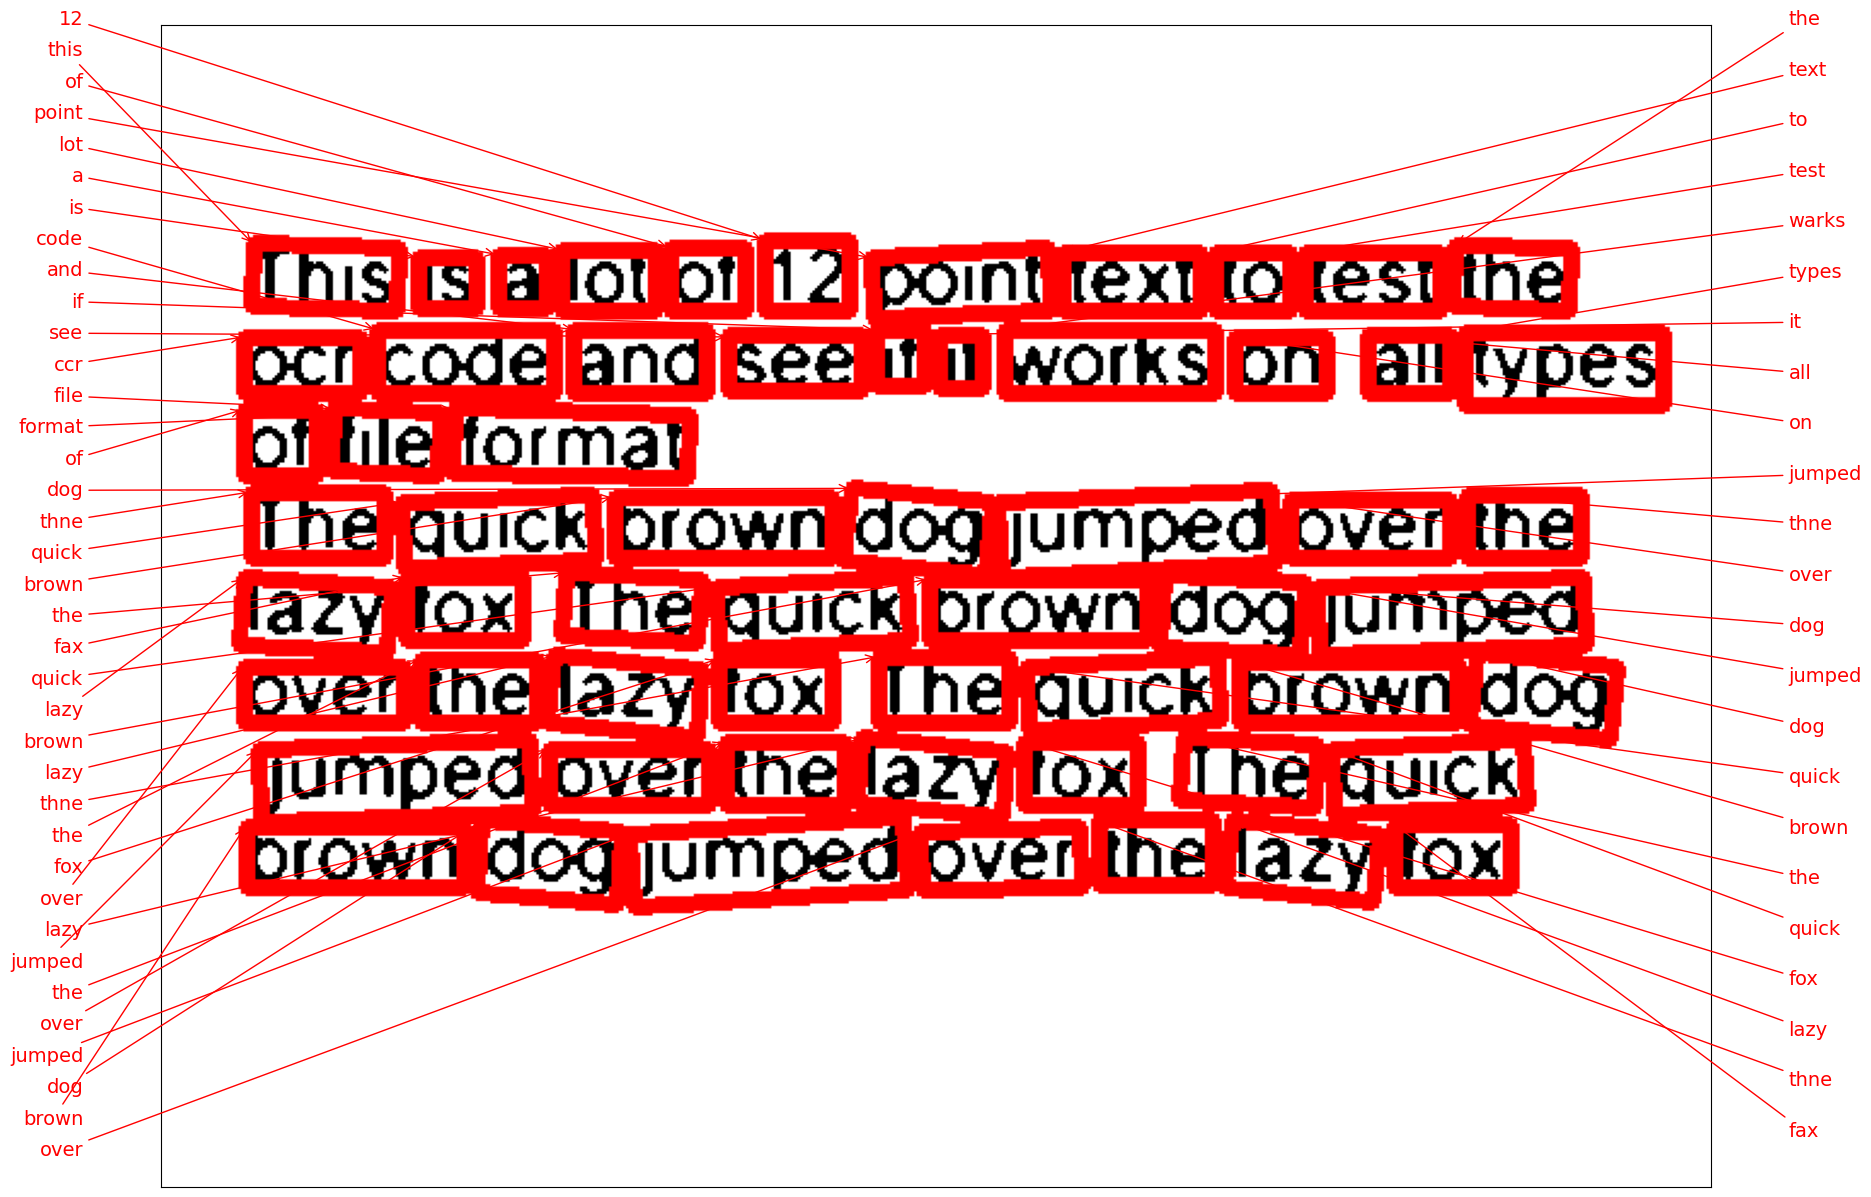

In [111]:
fig, axs = plt.subplots(figsize=(20, 20))
keras_ocr.tools.drawAnnotations(image=image[0], predictions=prediction_groups[0], ax=axs)
plt.show()